In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split


# fetch dataset
census_income_kdd = fetch_ucirepo(id=117)

# data (as pandas dataframes)
X = census_income_kdd.data.features
y = census_income_kdd.data.targets


In [5]:
import pandas as pd
df_features=pd.DataFrame(X)
df_targets=pd.DataFrame(y)

 doing the target encoding

In [6]:
# encoding the target values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_encoded_targets = encoder.fit_transform(df_targets['income'])

df_targets.head()
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the class mapping
print(class_mapping)

{' 50000+.': 0, '-50000': 1}


In [7]:
count_A=df_encoded_targets.sum()
count_B= len(df_encoded_targets)-count_A
print(f'number of people which are in class >50k: {count_B}')
print(f'number of people which are in class <=50k: {count_A}')

number of people which are in class >50k: 12382
number of people which are in class <=50k: 187141


doing th feautre encoding

In [8]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
o_encoder= OrdinalEncoder()
l_endcoder= LabelEncoder()
df_features=df_features.fillna(-1)
df_features=df_features.astype(str)
df_encoded_features= o_encoder.fit_transform(df_features)

# df_encoded_features = pd.DataFrame(df_encoded_features)
# df_encoded_targets = pd.DataFrame(df_encoded_targets)

### splitting the data first to avoid data leakage

In [9]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_encoded_features, df_encoded_targets, test_size=0.2, random_state=42)

ADASYN, SMOTE, RandomOverSampler

In [10]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [11]:
adasyn= ADASYN()
smote=SMOTE()
rs=RandomOverSampler()

df_adasyn_features, df_adasyn_targets=adasyn.fit_resample(X_train, y_train)
df_smote_features, df_smote_targets=smote.fit_resample(X_train, y_train)
df_rs_features, df_rs_targets=rs.fit_resample(X_train, y_train)

In [12]:

count_A=df_adasyn_targets.sum()
count_B= len(df_adasyn_targets)-count_A
print(f'ADASYN number of people which are in class +50k: {count_B.item()}')
print(f'ADASYN number of people which are in class -=50k: {count_A.item()}')

ADASYN number of people which are in class +50k: 148431
ADASYN number of people which are in class -=50k: 149598


In [13]:
count_A=df_smote_targets.sum()
count_B= len(df_smote_targets)-count_A
print(f'SMOTE number of people which are in class +50k: {count_B.item()}')
print(f'SMOTE number of people which are in class -=50k: {count_A.item()}')

SMOTE number of people which are in class +50k: 149598
SMOTE number of people which are in class -=50k: 149598


In [14]:
count_A=df_rs_targets.sum()
count_B= len(df_rs_targets)-count_A

print(f'RANDOMSAMPLER number of people which are in class +50k: {count_B.item()}')
print(f'RANDOMSAMPLER number of people which are in class -=50k: {count_A.item()}')

RANDOMSAMPLER number of people which are in class +50k: 149598
RANDOMSAMPLER number of people which are in class -=50k: 149598


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# defining the models
model_A= LogisticRegression()
model_S=LogisticRegression()
model_RS=LogisticRegression()
# training the models
model_A.fit(df_adasyn_features,df_adasyn_targets)
model_S.fit(df_smote_features,df_smote_targets)
model_RS.fit(df_rs_features,df_rs_targets)
# making the predictions
adasyn_preds= model_A.predict(X_test)
smote_preds=model_S.predict(X_test)
rs_preds=model_RS.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
# getting the accuracy and confuasion matrix form the mdoels
adasyn_acc= balanced_accuracy_score(y_test,adasyn_preds)
matrix_A=confusion_matrix(y_test, adasyn_preds)
print(f'The balanced accuracy score score of the model_A: {adasyn_acc}')
matrix_S=confusion_matrix(y_test, smote_preds)
S_acc= balanced_accuracy_score(y_test,smote_preds)
print(f'The balanced accuracy score score of the model_S: {S_acc}')
matrix_RS=confusion_matrix(y_test, rs_preds)
RS_acc= balanced_accuracy_score(y_test,rs_preds)
print(f'The balanced accuracy score score of the model_RS: {RS_acc}')

The balanced accuracy score score of the model_A: 0.7936294409506115
The balanced accuracy score score of the model_S: 0.7996163101309087
The balanced accuracy score score of the model_RS: 0.7982004230971236


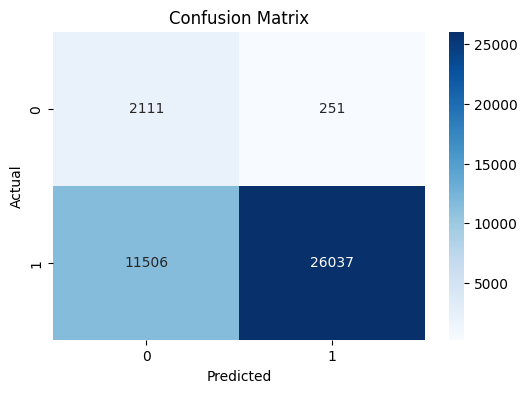

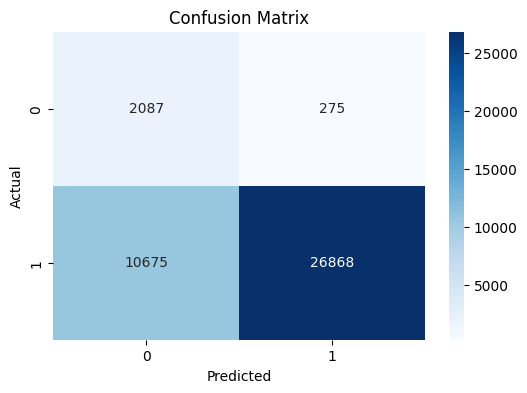

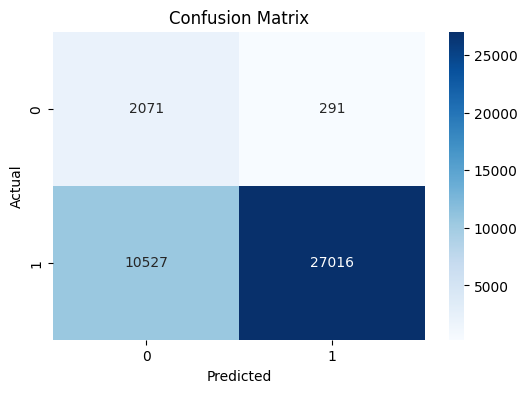

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
matrix_list=[matrix_A, matrix_S,matrix_RS]
for matrix in matrix_list:
  plt.figure(figsize=(6, 4))
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()


### knn classifier on first run

In [18]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(2)
model_KNN.fit(df_adasyn_features,df_adasyn_targets)
knn_preds=model_KNN.predict(X_test)

In [20]:
knn_acc= balanced_accuracy_score(y_test,knn_preds)
matrix_knn=confusion_matrix(y_test,knn_preds)
print(f'The balanced accuracy score score of the model: {knn_acc}')

The balanced accuracy score score of the model: 0.6867984603733979


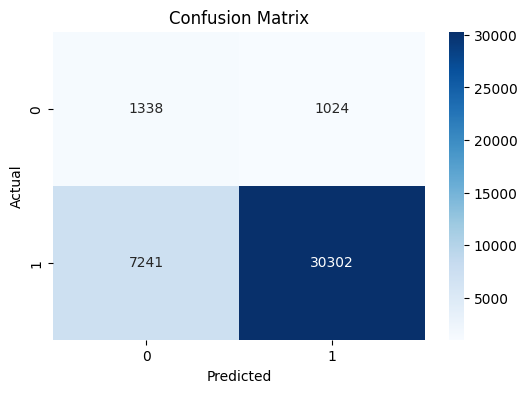

In [21]:
# knn classifi
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN on second run(split later)

In [22]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [23]:
# importing data
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
census_income_kdd = fetch_ucirepo(id=117)
X = census_income_kdd.data.features
y = census_income_kdd.data.targets

In [24]:
# encoding the labels and features
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
o_encoder= OrdinalEncoder()
l_endcoder= LabelEncoder()
X=X.fillna(-1)
X=X.astype(str)
X_encoded_features= o_encoder.fit_transform(X)
y_encoded_targets=o_encoder.fit_transform(y)


In [25]:
# using only ADASYN
adasyn= ADASYN()
X_adasyn_features, y_adasyn_targets=adasyn.fit_resample(X_encoded_features,y_encoded_targets)

In [31]:
# spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_adasyn_features, y_adasyn_targets, test_size=0.2, random_state=42)

In [38]:
# training two models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model_LR= LogisticRegression()
model_KNN=KNeighborsClassifier(2)

model_KNN.fit(df_adasyn_features,df_adasyn_targets)
model_LR.fit(df_adasyn_features,df_adasyn_targets)

knn_preds=model_KNN.predict(X_test)
LR_preds=model_LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# checking acc of models
knn_acc= balanced_accuracy_score(y_test,knn_preds)
matrix_knn=confusion_matrix(y_test,knn_preds)
print(f'The balanced accuracy score score of the model_knn: {knn_acc}')

LR_acc= balanced_accuracy_score(y_test,LR_preds)
matrix_LR=confusion_matrix(y_test,LR_preds)
print(f'The balanced accuracy score score of the model_LR: {LR_acc}')

The balanced accuracy score score of the model_knn: 0.8963964170141528
The balanced accuracy score score of the model_LR: 0.7956306330577843


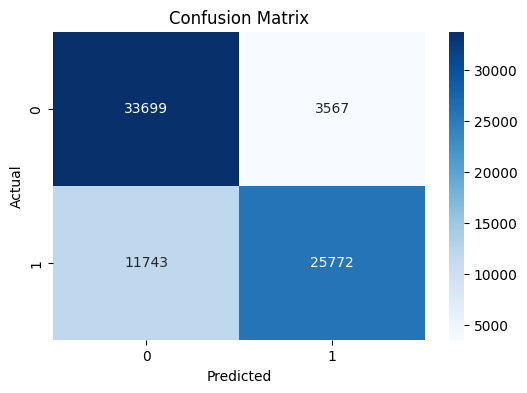

In [40]:
#  confusion mnatrix of logistic regression model
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_LR, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

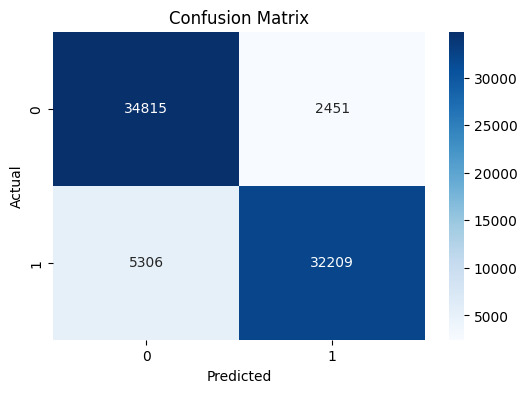

In [41]:
# confusion matirx of KNN model
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

+ when i split the data before doing the upsampling *to avoide data leakage* logistic regression model **(0.79)** performs better than KNN model **(0.68)**.
+ when i split the data after doing the upsampling logistic regression model**(0.79)** performs worse than KNN model**(0.89)**.
+ **accuracy of KNN model increased while the accuracy of logistic regression model remained same.**

Q: why did KNN perfom worse in first run and better in second run? is this becasue of the data leakage?
